In [1]:
import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from pylab import rcParams
import matplotlib as mpl
from matplotlib.pyplot import figure
import random
import time
import gc
import os
from datetime import datetime
import seaborn as sns
from matplotlib.pylab import rcParams
sns.set_style("whitegrid")

In [2]:
train=pd.read_csv('fashion-mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Lets split the training data into train/test and then train models on it. <br>
At the very end we will upload the test set and check how accurate the models we built are.

In [3]:
y = train['label'].values
x = train.drop(columns = ['label'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (42000, 784)
 Shape of x_test =  (18000, 784)
 Shape of y_train =  (42000,)
 Shape of y_test =  (18000,)


# Dictionary for  10 classes is as follows:
##  <font color='green'>0 &#8594; T-shirt/top
##  <font color='blue'>1&#8594; Trouser
##  <font color='gold'>2 &#8594; Pullover
##  <font color='red'>3 &#8594; Dress
##  <font color='orange'>4 &#8594; Coat
##  <font color='purple'>5 &#8594; Sandal
##  <font color='cyan'>6 &#8594; Shirt
##  <font color='pink'>7 &#8594; Sneaker
##  <font color='brown'>8 &#8594; Bag
##  <font color='grey'>9 &#8594; Ankle boot

Let's show now A sample of A couple of pictures 

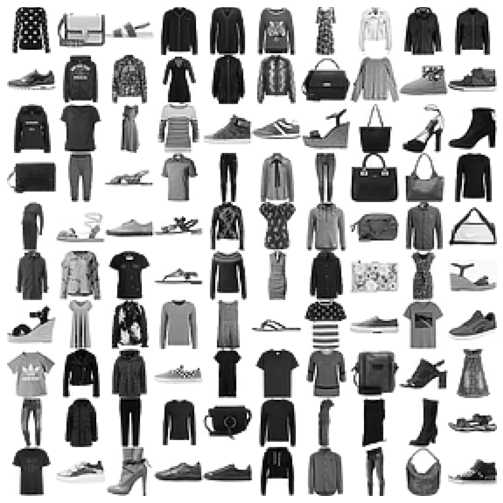

In [4]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(9,9))
example_images = x_train[:100]
plot_digits(example_images.values, images_per_row=10)
plt.show()



# Let's view some images!



> Lets run A simple for loop and show the 10 first image's.

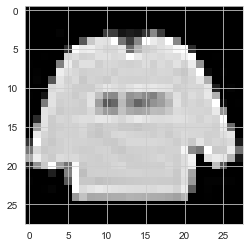

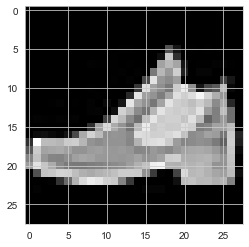

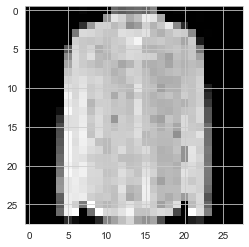

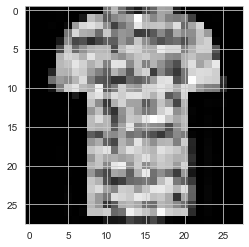

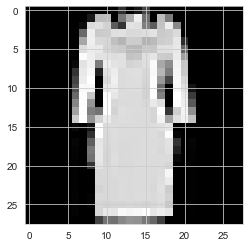

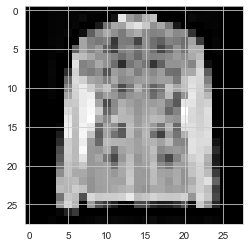

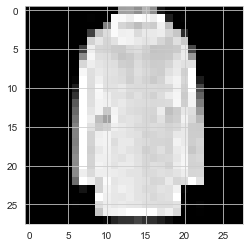

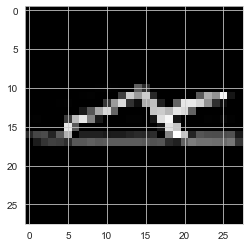

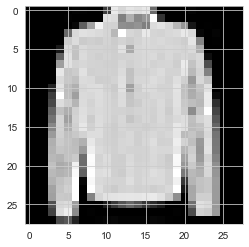

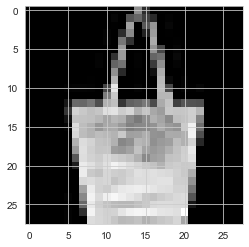

In [5]:
data_imaging = train.copy()

for i in range(10):
    plt.imshow(data_imaging.iloc[i,1:].values.reshape((28,28)).copy(), cmap = 'gray') 
    plt.show()

# Data preprocessing

#### Scaling are data set before we reduce dimensionality 

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<b> Dimensionality reduction #need to add explanation here

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=d)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.transform(x_test)
pca.n_components_

254

## It's time to start training models!

### <font color='blue'> Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,solver='liblinear')
log_reg.fit(x_train_reduced, y_train)
log_reg.score(x_test_reduced, y_test)

### <font color='blue'> Knn Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_c = KNeighborsClassifier(n_jobs=6)
knn_c.fit(x_train_reduced, y_train)
knn_c.score(x_test_reduced, y_test)

0.8607777777777778

### <font color='blue'> Pipeline for K-means

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
k = 5
kmeans = KMeans(n_clusters=k)
pipeline = Pipeline([
 ("kmeans", MiniBatchKMeans(n_clusters=5,random_state=0,n_jobs=-1)),
 ("knn_c", KNeighborsClassifier(n_jobs=6)),
])
pipeline.fit(x_train_reduced, y_train)
pipeline.score(x_test_reduced, y_test)

c:\users\shaul\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0.7157222222222223

Not a great score. Let's run a grid search to find what is the best value to use for k in order to optmize are pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2,100,10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2,n_jobs=6)
grid_clf.fit(x_train_reduced, y_train)
grid_clf.best_params_
grid_clf.score(x_test_reduced, y_test)

### <font color='blue'> Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)
prediction_test = model_rf.predict(x_test)
(metrics.accuracy_score(y_test, prediction_test)))

### <font color='blue'> AdaBoost